#Predicting Credit Scores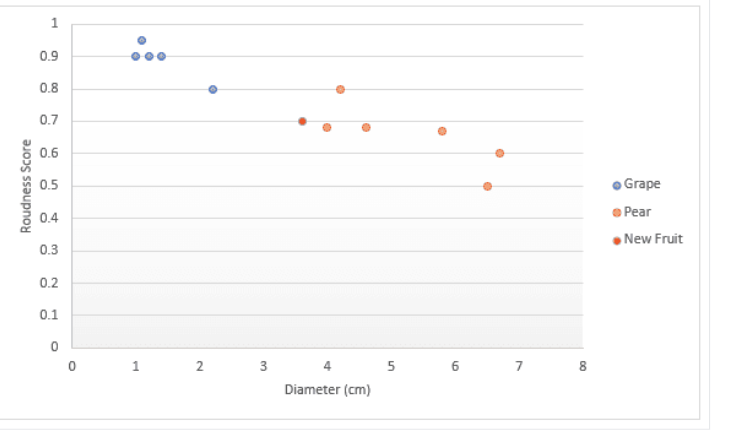

**Objective**
The purpose of this model is to predict an individidual's credit score. This model could be used by banks to determine a person's probability of defaulting on a loan.

**Dataset**
https://www.kaggle.com/datasets/sujithmandala/credit-score-classification-dataset

The features in this dataset include the following:


*   age
*   gender
* income
* education
* marital status
* number of children
* home ownership
*credit score


**Methadology**


I will use supervised learning in the form of a K-Nearest Neighbors (KNN) algorithm. I can use supervised learning because the dataset includes labeled data that has been tagged with a correct classification (in this case, credit score). The trained machine should be able to make predictions on credit score (low, high, average) based on the user's age, gender, income, education, marital status, number of children, and home ownership. This is a classification problem because I predict categorical values of credit score. The KNN algorithm will predict the lavel of its K nearest neighbors (in this model, it is 3) in the training dataset.

# Data Understanding



**Exporatory Data Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import seaborn as sns
import os
import plotly.graph_objects as go


#importing the Scikit-learn KNeighborsClassifier, the train_test_split() function for splitting the data into training
#and test sets, and the metric accuracy_score to evauluate the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sns.set_theme()

#Load dataset
csv_file_path = os.path.abspath('dataset.csv')

#Read the CSV file into a dataframe
df = pd.read_csv(csv_file_path);

#Get first 10 lines of file to see if dataset works as intended
df.head(10)



,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
5,50,Male,150000,Master's Degree,Married,0,Owned,High
6,26,Female,40000,Associate's Degree,Single,0,Rented,Average
7,31,Male,60000,Bachelor's Degree,Single,0,Rented,Average
8,36,Female,80000,Master's Degree,Married,2,Owned,High
9,41,Male,105000,Doctorate,Single,0,Owned,High


In [ ]:
#number of observations and features
df.shape

(164, 8)

In [ ]:
#data types
df.dtypes

Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object

**Visualization**

<Axes: xlabel='Age', ylabel='Count'>

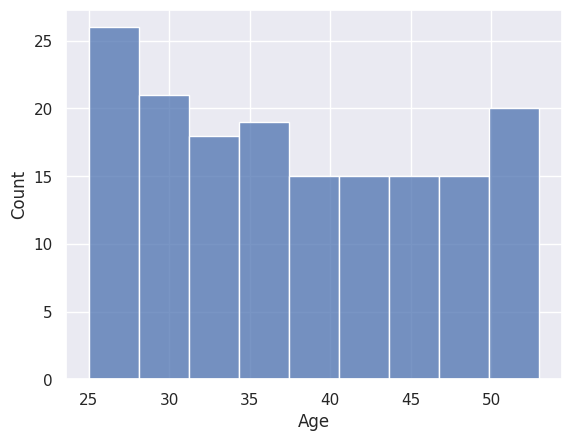

In [ ]:
sns.histplot(data=df, x="Age")

<Axes: xlabel='Number of Children', ylabel='Count'>

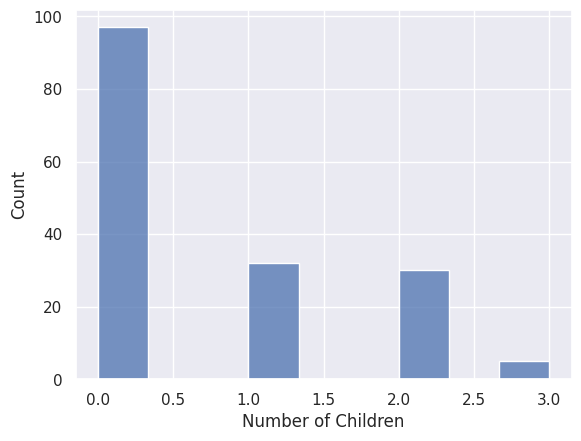

In [ ]:
sns.histplot(data=df, x="Number of Children")

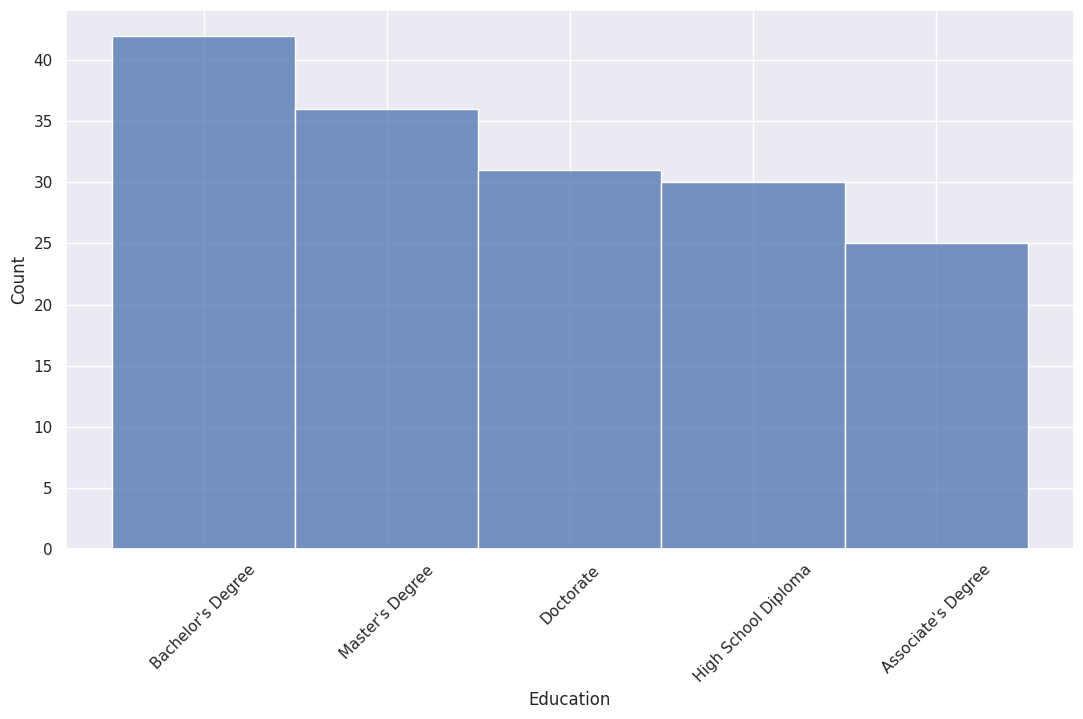

In [ ]:
cat_order = ["Bachelor's Degree", "Master's Degree", "Doctorate", "High School Diploma", "Associate's Degree"]
df['Education']=pd.Categorical(df['Education'], cat_order)

fig2 = plt.figure(figsize=(13,7))
ax = sns.histplot(data=df, x="Education")
t2=plt.xticks(rotation=45)

# Training and Testing

In [ ]:
print(df.dtypes)

Age                      int64
Gender                  object
Income                   int64
Education             category
Marital Status          object
Number of Children       int64
Home Ownership          object
Credit Score            object
dtype: object


Unforutanately, I could only train on three features because I couldn't figure out how to convert the datatypes of the category columns but in the future, I would convert those datatypes to floats so I could train on all features.

In [ ]:
#creating labels for the training set
X = df[['Age','Income','Number of Children']]
y = df['Credit Score']
print("Number of examples: " + str(X.shape[0]))
print("Number of features: " + str(X.shape[1]))
print("\nFeatures:\n")
print(X)
print("\nLabels:\n")
print(y)

Number of examples: 164
Number of features: 3

Features:

     Age  Income  Number of Children
0     25   50000                   0
1     30  100000                   2
2     35   75000                   1
3     40  125000                   0
4     45  100000                   3
..   ...     ...                 ...
159   29   27500                   0
160   34   47500                   0
161   39   62500                   2
162   44   87500                   0
163   49   77500                   1

[164 rows x 3 columns]

Labels:

0         High
1         High
2         High
3         High
4         High
        ...   
159        Low
160    Average
161       High
162       High
163       High
Name: Credit Score, Length: 164, dtype: object


Using the train_test_split function, I will split the dataset randomly so that 25% of the data is reserved for the test set and 75% is reserved for the training set.

Since using this function will randomly split the data each time the model is run, I will impose a state so that I get the same split every time I run my model.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=4)

#initialize the model
model = KNeighborsClassifier(n_neighbors=3)

#train the model using the training sets
model.fit(X_train, y_train)

#make predictions on the test set
prediction = model.predict(X_test)

print(prediction)




['Low' 'Average' 'High' 'High' 'Low' 'High' 'Low' 'Average' 'High' 'High'
 'High' 'Average' 'High' 'High' 'Average' 'High' 'High' 'High' 'Average'
 'Average' 'High' 'High' 'High' 'High' 'Average' 'High' 'Average' 'High'
 'High' 'Low' 'High' 'High' 'High' 'Low' 'High' 'Low' 'High' 'High' 'High'
 'Average' 'Average']


# Accuracy

In [ ]:
#model's accuracy score
score = accuracy_score(y_test, prediction)
print('Accuracy score of model: ' + str(score))

Accuracy score of model: 0.8780487804878049
